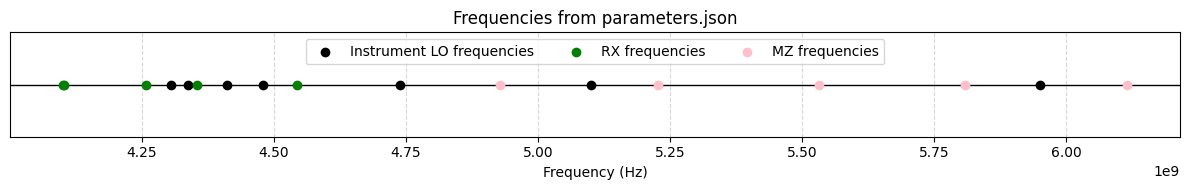

In [3]:
import json
import matplotlib.pyplot as plt

# Load parameters.json
with open("parameters.json") as f:
    data = json.load(f)

# 1. Instrument frequencies (black points)
instrument_paths = [
    ("qrm_rf0", "o1", "lo_frequency"),
    ("qrm_rf1", "o1", "lo_frequency"),
    ("qcm_rf0", "o1", "lo_frequency"),
    ("qcm_rf0", "o2", "lo_frequency"),
    ("qcm_rf1", "o1", "lo_frequency"),
    ("qcm_rf1", "o2", "lo_frequency"),
    ("qcm_rf2", "o1", "lo_frequency"),
]
instrument_freqs = []
for inst, out, key in instrument_paths:
    try:
        freq = data["instruments"][inst][out][key]
        instrument_freqs.append(freq)
    except KeyError:
        pass

# 2. RX frequencies (green)
rx_freqs = []
for gates in data["native_gates"]["single_qubit"].values():
    if "RX" in gates and "frequency" in gates["RX"]:
        rx_freqs.append(gates["RX"]["frequency"])

# 3. MZ frequencies (pink)
mz_freqs = []
for gates in data["native_gates"]["single_qubit"].values():
    if "MZ" in gates and "frequency" in gates["MZ"]:
        mz_freqs.append(gates["MZ"]["frequency"])

# Plot: all points at y=0
plt.figure(figsize=(12, 2))
plt.scatter(instrument_freqs, [0]*len(instrument_freqs), color="black", label="Instrument LO frequencies", zorder=3)
plt.scatter(rx_freqs, [0]*len(rx_freqs), color="green", label="RX frequencies", zorder=3)
plt.scatter(mz_freqs, [0]*len(mz_freqs), color="pink", label="MZ frequencies", zorder=3)

plt.axhline(0, color='black', linewidth=1)  # Draw horizontal axis

plt.yticks([])
plt.xlabel("Frequency (Hz)")
plt.title("Frequencies from parameters.json")
plt.legend(loc="upper center", ncol=3)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()